In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
import math as ma
import seaborn as sns
import autograd.numpy as np
from sklearn.decomposition import PCA


from sklearn.datasets import load_breast_cancer

# Setting up Data

In [14]:
np.random.seed(644)
BC = load_breast_cancer()
X = BC.data.copy()
z = BC.target.copy()

In [15]:
np.random.seed(644)
scaler_bc = StandardScaler()




In [16]:
target_names = BC.target_names.copy()
names = BC.feature_names.copy()
print(names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Classifying Malignant and benign

In [17]:
def diag(patients):
    d = []
    for x in range(len(patients)):
        if patients[x] == 1:
            d.append("M")
        else: 
            d.append("B")
    return d
diagnosis = (diag(z))    

In [18]:
paitent_nr = []

for i in range(1,len(X)+1):
    paitent_nr.append("patient {}".format(i))

Creating a dataframe with features but not targets.

In [19]:
df_features = pd.DataFrame(X,index = paitent_nr, columns = names)

In [21]:
df_features

mean radius  mean texture  mean perimeter  mean area  \
patient 1          17.99         10.38          122.80     1001.0   
patient 2          20.57         17.77          132.90     1326.0   
patient 3          19.69         21.25          130.00     1203.0   
patient 4          11.42         20.38           77.58      386.1   
patient 5          20.29         14.34          135.10     1297.0   
...                  ...           ...             ...        ...   
patient 565        21.56         22.39          142.00     1479.0   
patient 566        20.13         28.25          131.20     1261.0   
patient 567        16.60         28.08          108.30      858.1   
patient 568        20.60         29.33          140.10     1265.0   
patient 569         7.76         24.54           47.92      181.0   

             mean smoothness  mean compactness  mean concavity  \
patient 1            0.11840           0.27760         0.30010   
patient 2            0.08474           0.07864         0.08690   
patient 3            0.10960           0.15990         0.19740   
patient 4            0.14250           0.28390         0.24140   
patient 5            0.10030           0.13280         0.19800   
...                      ...               ...             ...   
patient 565          0.11100           0.11590         0.24390   
patient 566          0.09780           0.10340         0.14400   
patient 567          0.08455           0.10230         0.09251   
patient 568          0.11780           0.27700         0.35140   
patient 569          0.05263           0.04362         0.00000   

             mean concave points  mean symmetry  mean fractal dimension  ...  \
patient 1                0.14710         0.2419                 0.07871  ...   
patient 2                0.07017         0.1812                 0.05667  ...   
patient 3                0.12790         0.2069                 0.05999  ...   
patient 4                0.10520         0.2597                 0.09744  ...   
patient 5                0.10430         0.1809                 0.05883  ...   
...                          ...            ...                     ...  ...   
patient 565              0.13890         0.1726                 0.05623  ...   
patient 566              0.09791         0.1752                 0.05533  ...   
patient 567              0.05302         0.1590                 0.05648  ...   
patient 568              0.15200         0.2397                 0.07016  ...   
patient 569              0.00000         0.1587                 0.05884  ...   

             worst radius  worst texture  worst perimeter  worst area  \
patient 1          25.380          17.33           184.60      2019.0   
patient 2          24.990          23.41           158.80      1956.0   
patient 3          23.570          25.53           152.50      1709.0   
patient 4          14.910          26.50            98.87       567.7   
patient 5          22.540          16.67           152.20      1575.0   
...                   ...            ...              ...         ...   
patient 565        25.450          26.40           166.10      2027.0   
patient 566        23.690          38.25           155.00      1731.0   
patient 567        18.980          34.12           126.70      1124.0   
patient 568        25.740          39.42           184.60      1821.0   
patient 569         9.456          30.37            59.16       268.6   

             worst smoothness  worst compactness  worst concavity  \
patient 1             0.16220            0.66560           0.7119   
patient 2             0.12380            0.18660           0.2416   
patient 3             0.14440            0.42450           0.4504   
patient 4             0.20980            0.86630           0.6869   
patient 5             0.13740            0.20500           0.4000   
...                       ...                ...              ...   
patient 565           0.14100            0.21130           0.4107   
p

# Checking covariance

In [36]:
cov_matrix = pd.DataFrame.cov(df_features)

<AxesSubplot:>

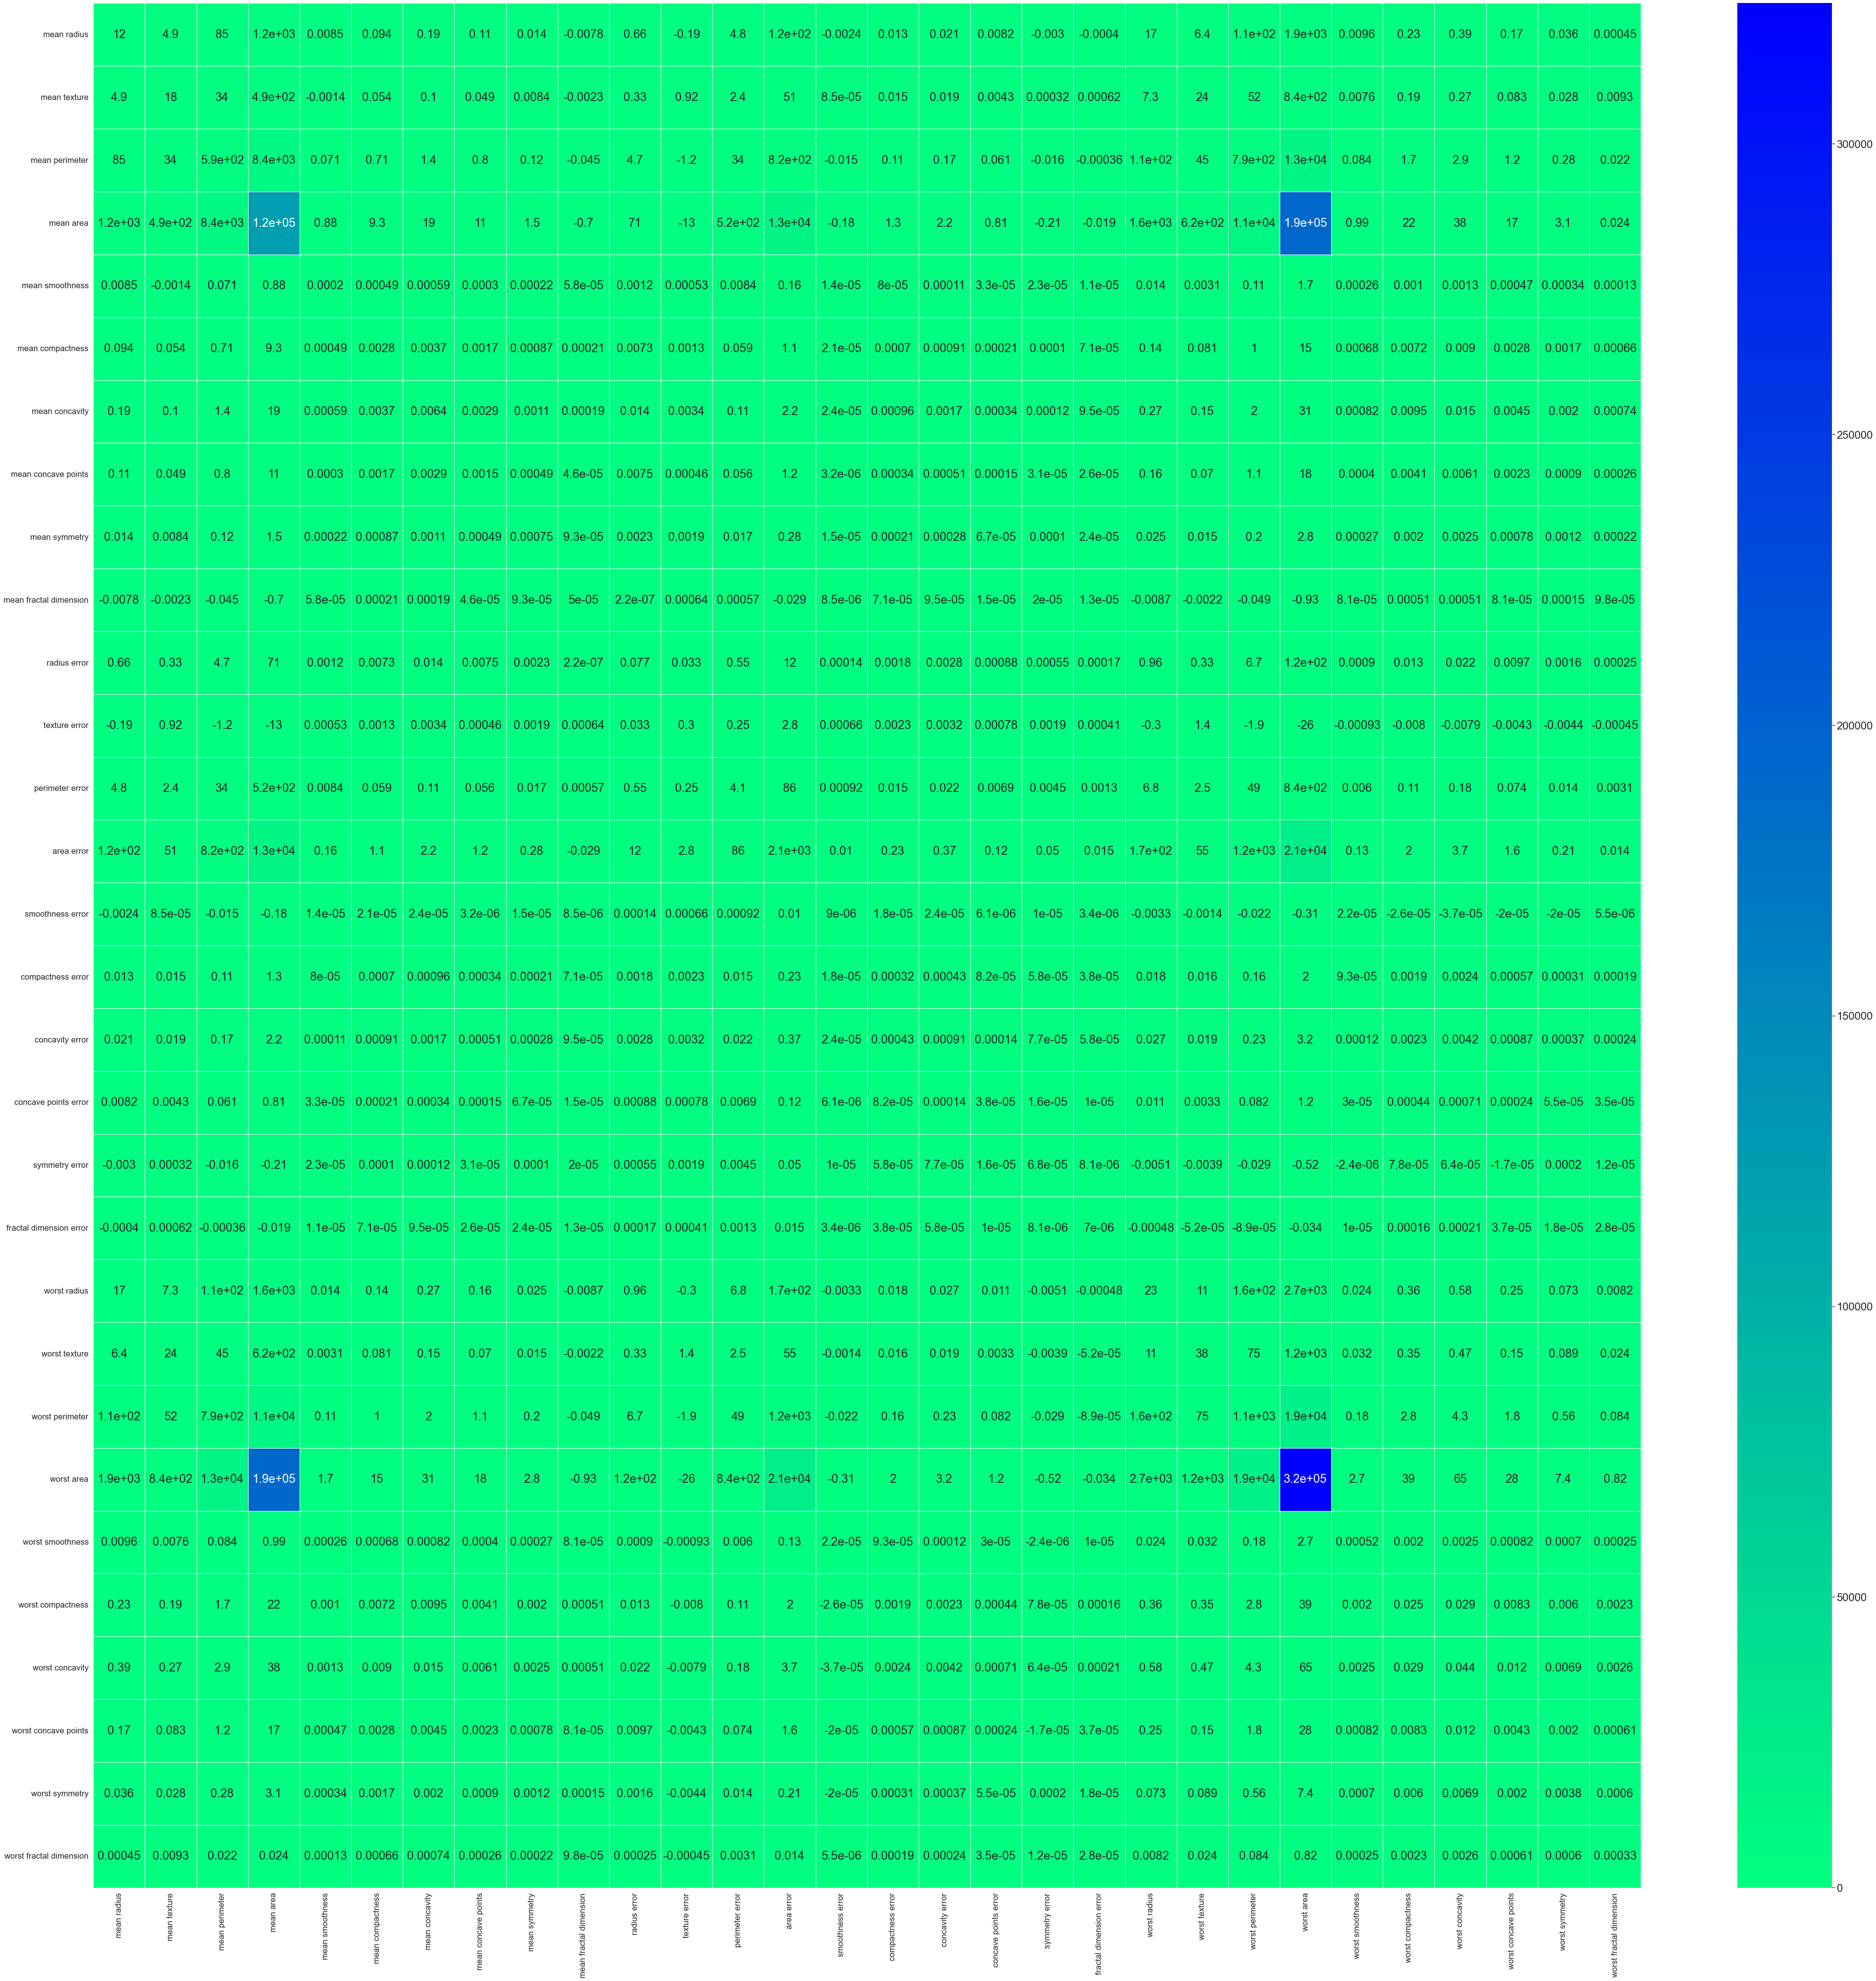

In [26]:

fig, ax = plt.subplots(figsize=(70,70)) 
sns.set(font_scale=2)
sns.heatmap(cov_matrix,cmap='winter_r', annot=True ,linewidths=.9,ax =ax ,fmt = ".2g") # _r to reverse the cmap

# Correlation matrix

In [27]:
corr_matrix = df_features.corr()


<AxesSubplot:>

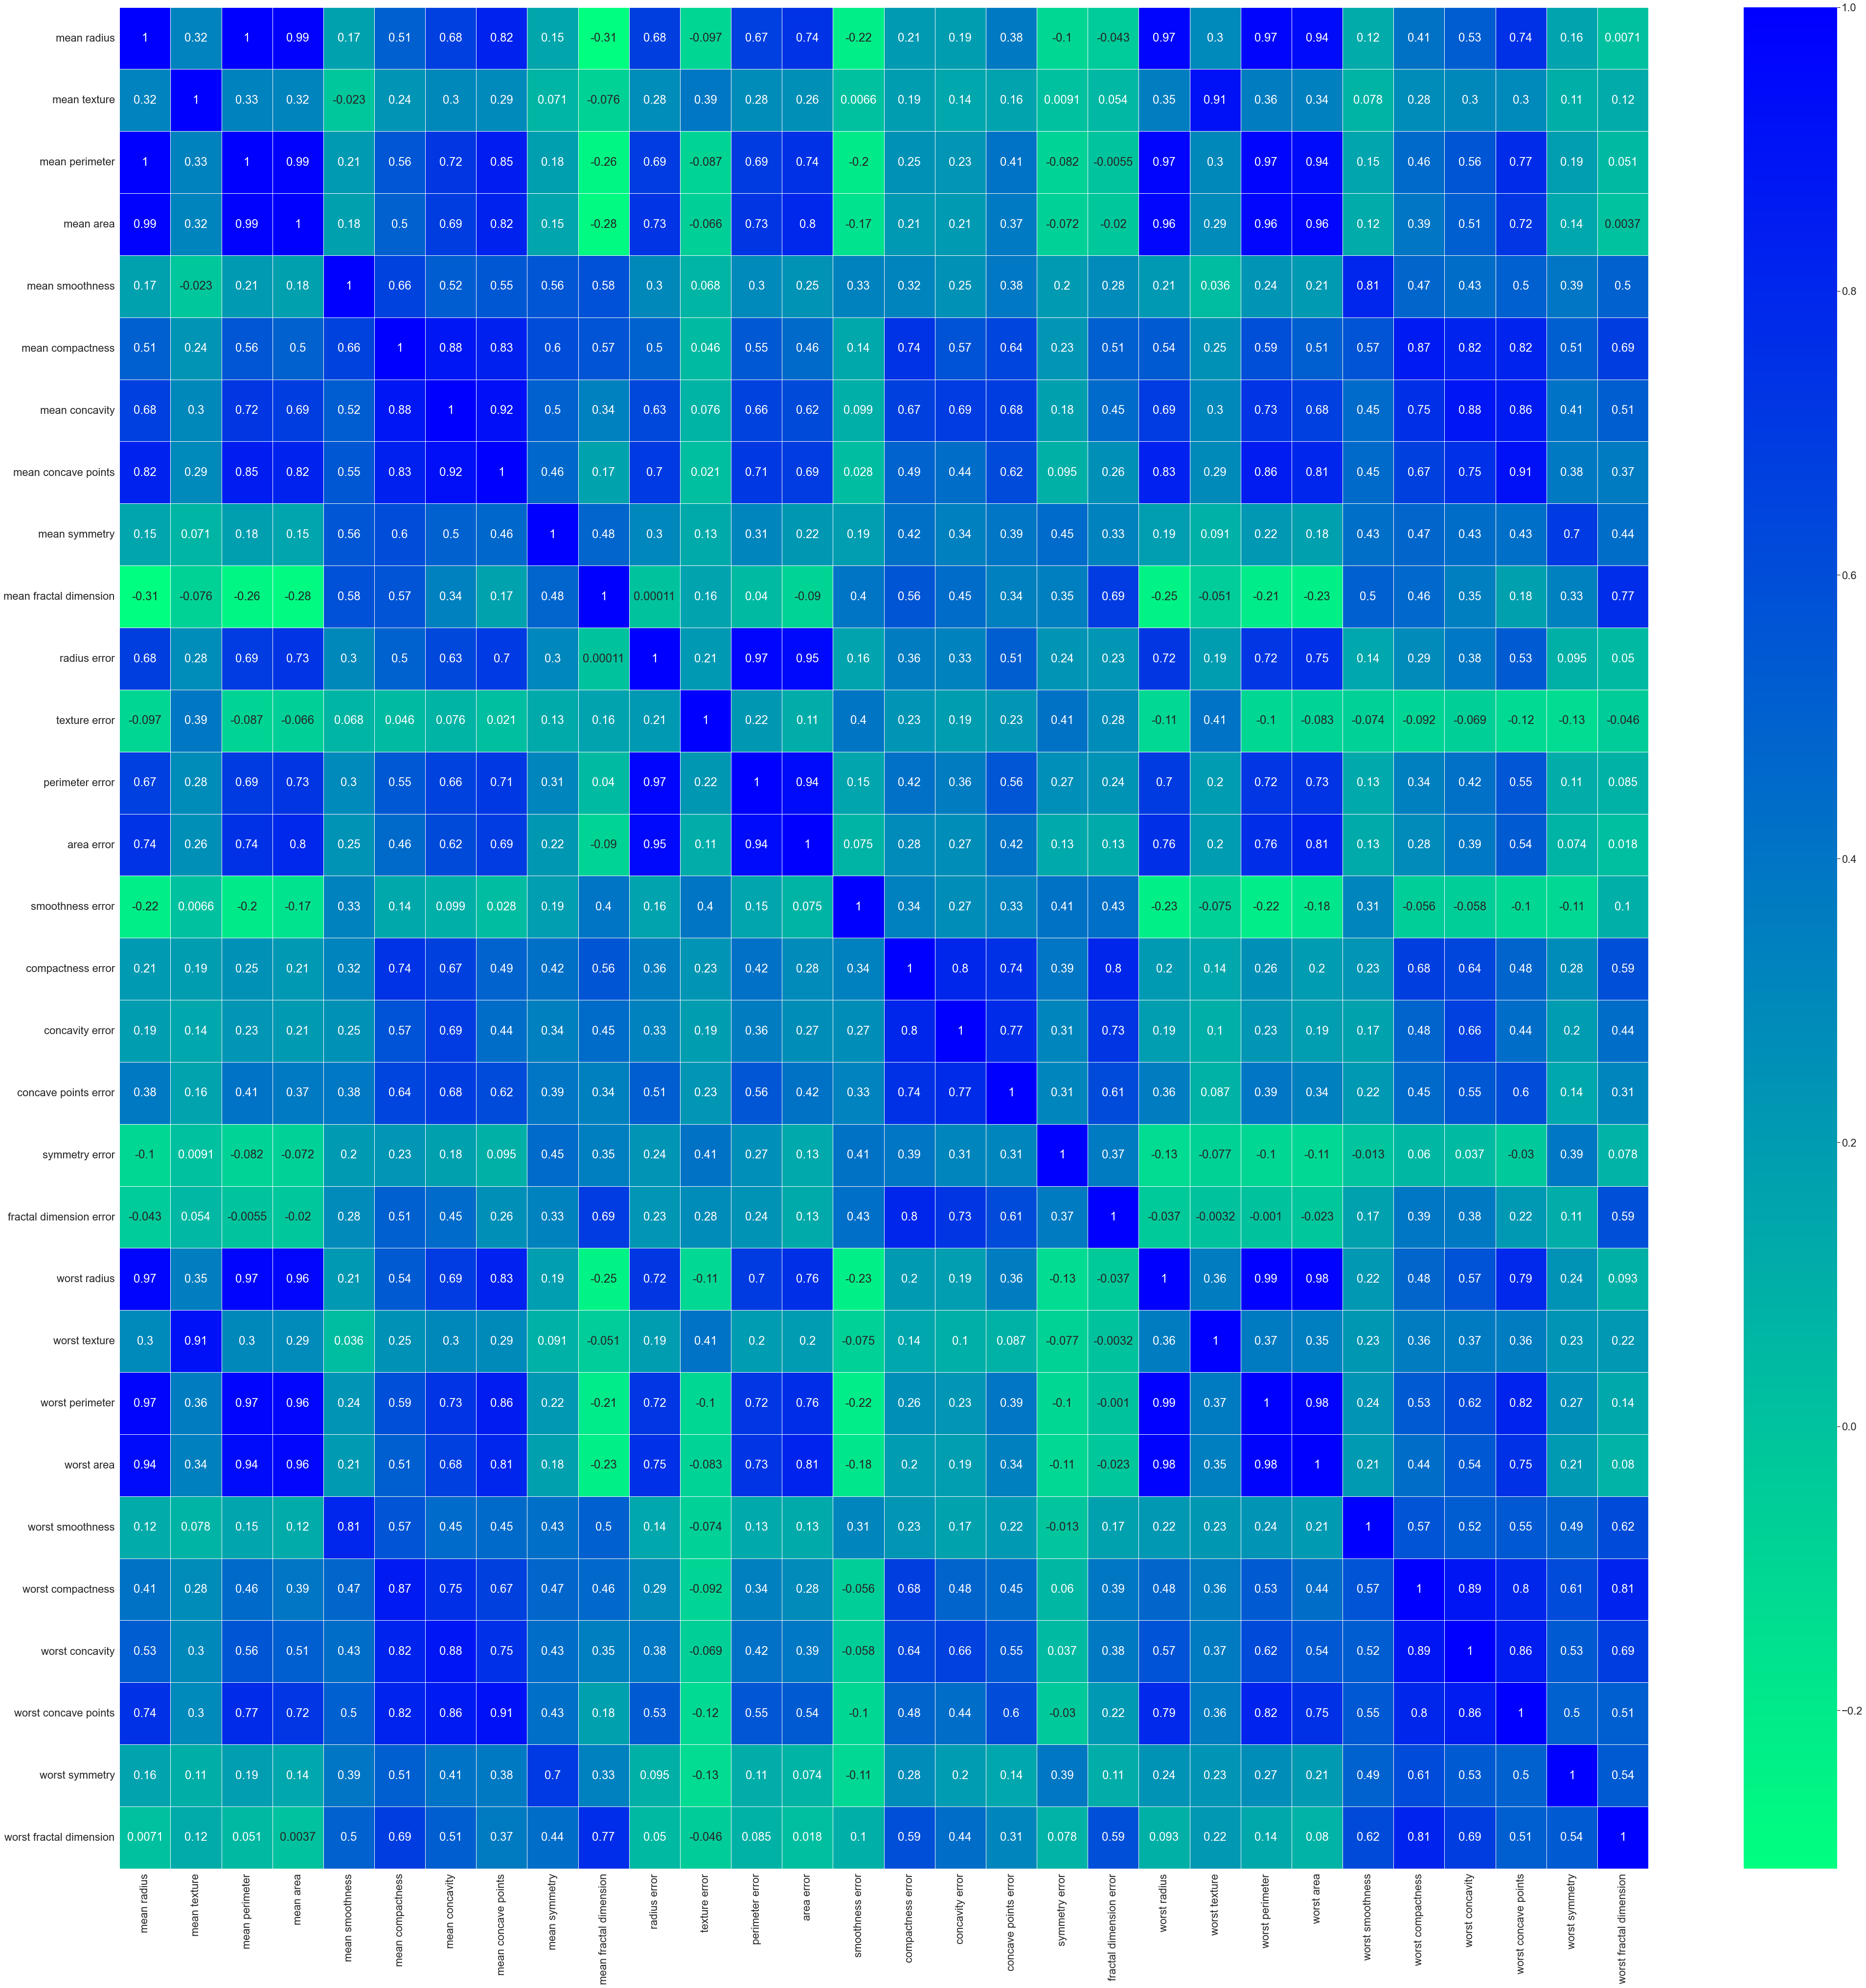

In [28]:
fig, ax = plt.subplots(figsize=(70,70)) 
sns.set(font_scale=2)
sns.heatmap(corr_matrix,cmap='winter_r', annot=True ,linewidths=.9,ax =ax ,fmt = ".2g") # _r to reverse the cmap

# Plotting Frequency of correlations 

In [34]:

# all values below 0.61 = 0 and all values above = One
a = corr_matrix.where(corr_matrix>0.61,0,inplace=True)
b = corr_matrix.where(corr_matrix<0.61,1,inplace=True)
correlation = corr_matrix.to_numpy()
print(correlation)



[[1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
  0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
  0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
  0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 1. 1. 0. 1.]
 [1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
  0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.
  0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 

In [37]:
strong_corr = []

for i in range(len(correlation)):
    
    strong_corr.append(correlation[i,:].sum()-1)
    
print(strong_corr)
print(names)

[11.0, 1.0, 11.0, 11.0, 2.0, 9.0, 17.0, 15.0, 1.0, 2.0, 10.0, 0.0, 10.0, 10.0, 0.0, 7.0, 5.0, 6.0, 0.0, 4.0, 11.0, 1.0, 12.0, 11.0, 2.0, 8.0, 9.0, 11.0, 2.0, 5.0]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [38]:
strong_corr = np.array(strong_corr) 
index = np.argwhere(strong_corr == 0.0)

print(index)
      


[[11]
 [14]
 [18]]


In [39]:
strong_corr = np.delete(strong_corr,index)
name_list = np.delete(names,index)

Text(0, 0.5, 'num of Features correlated with feature x')

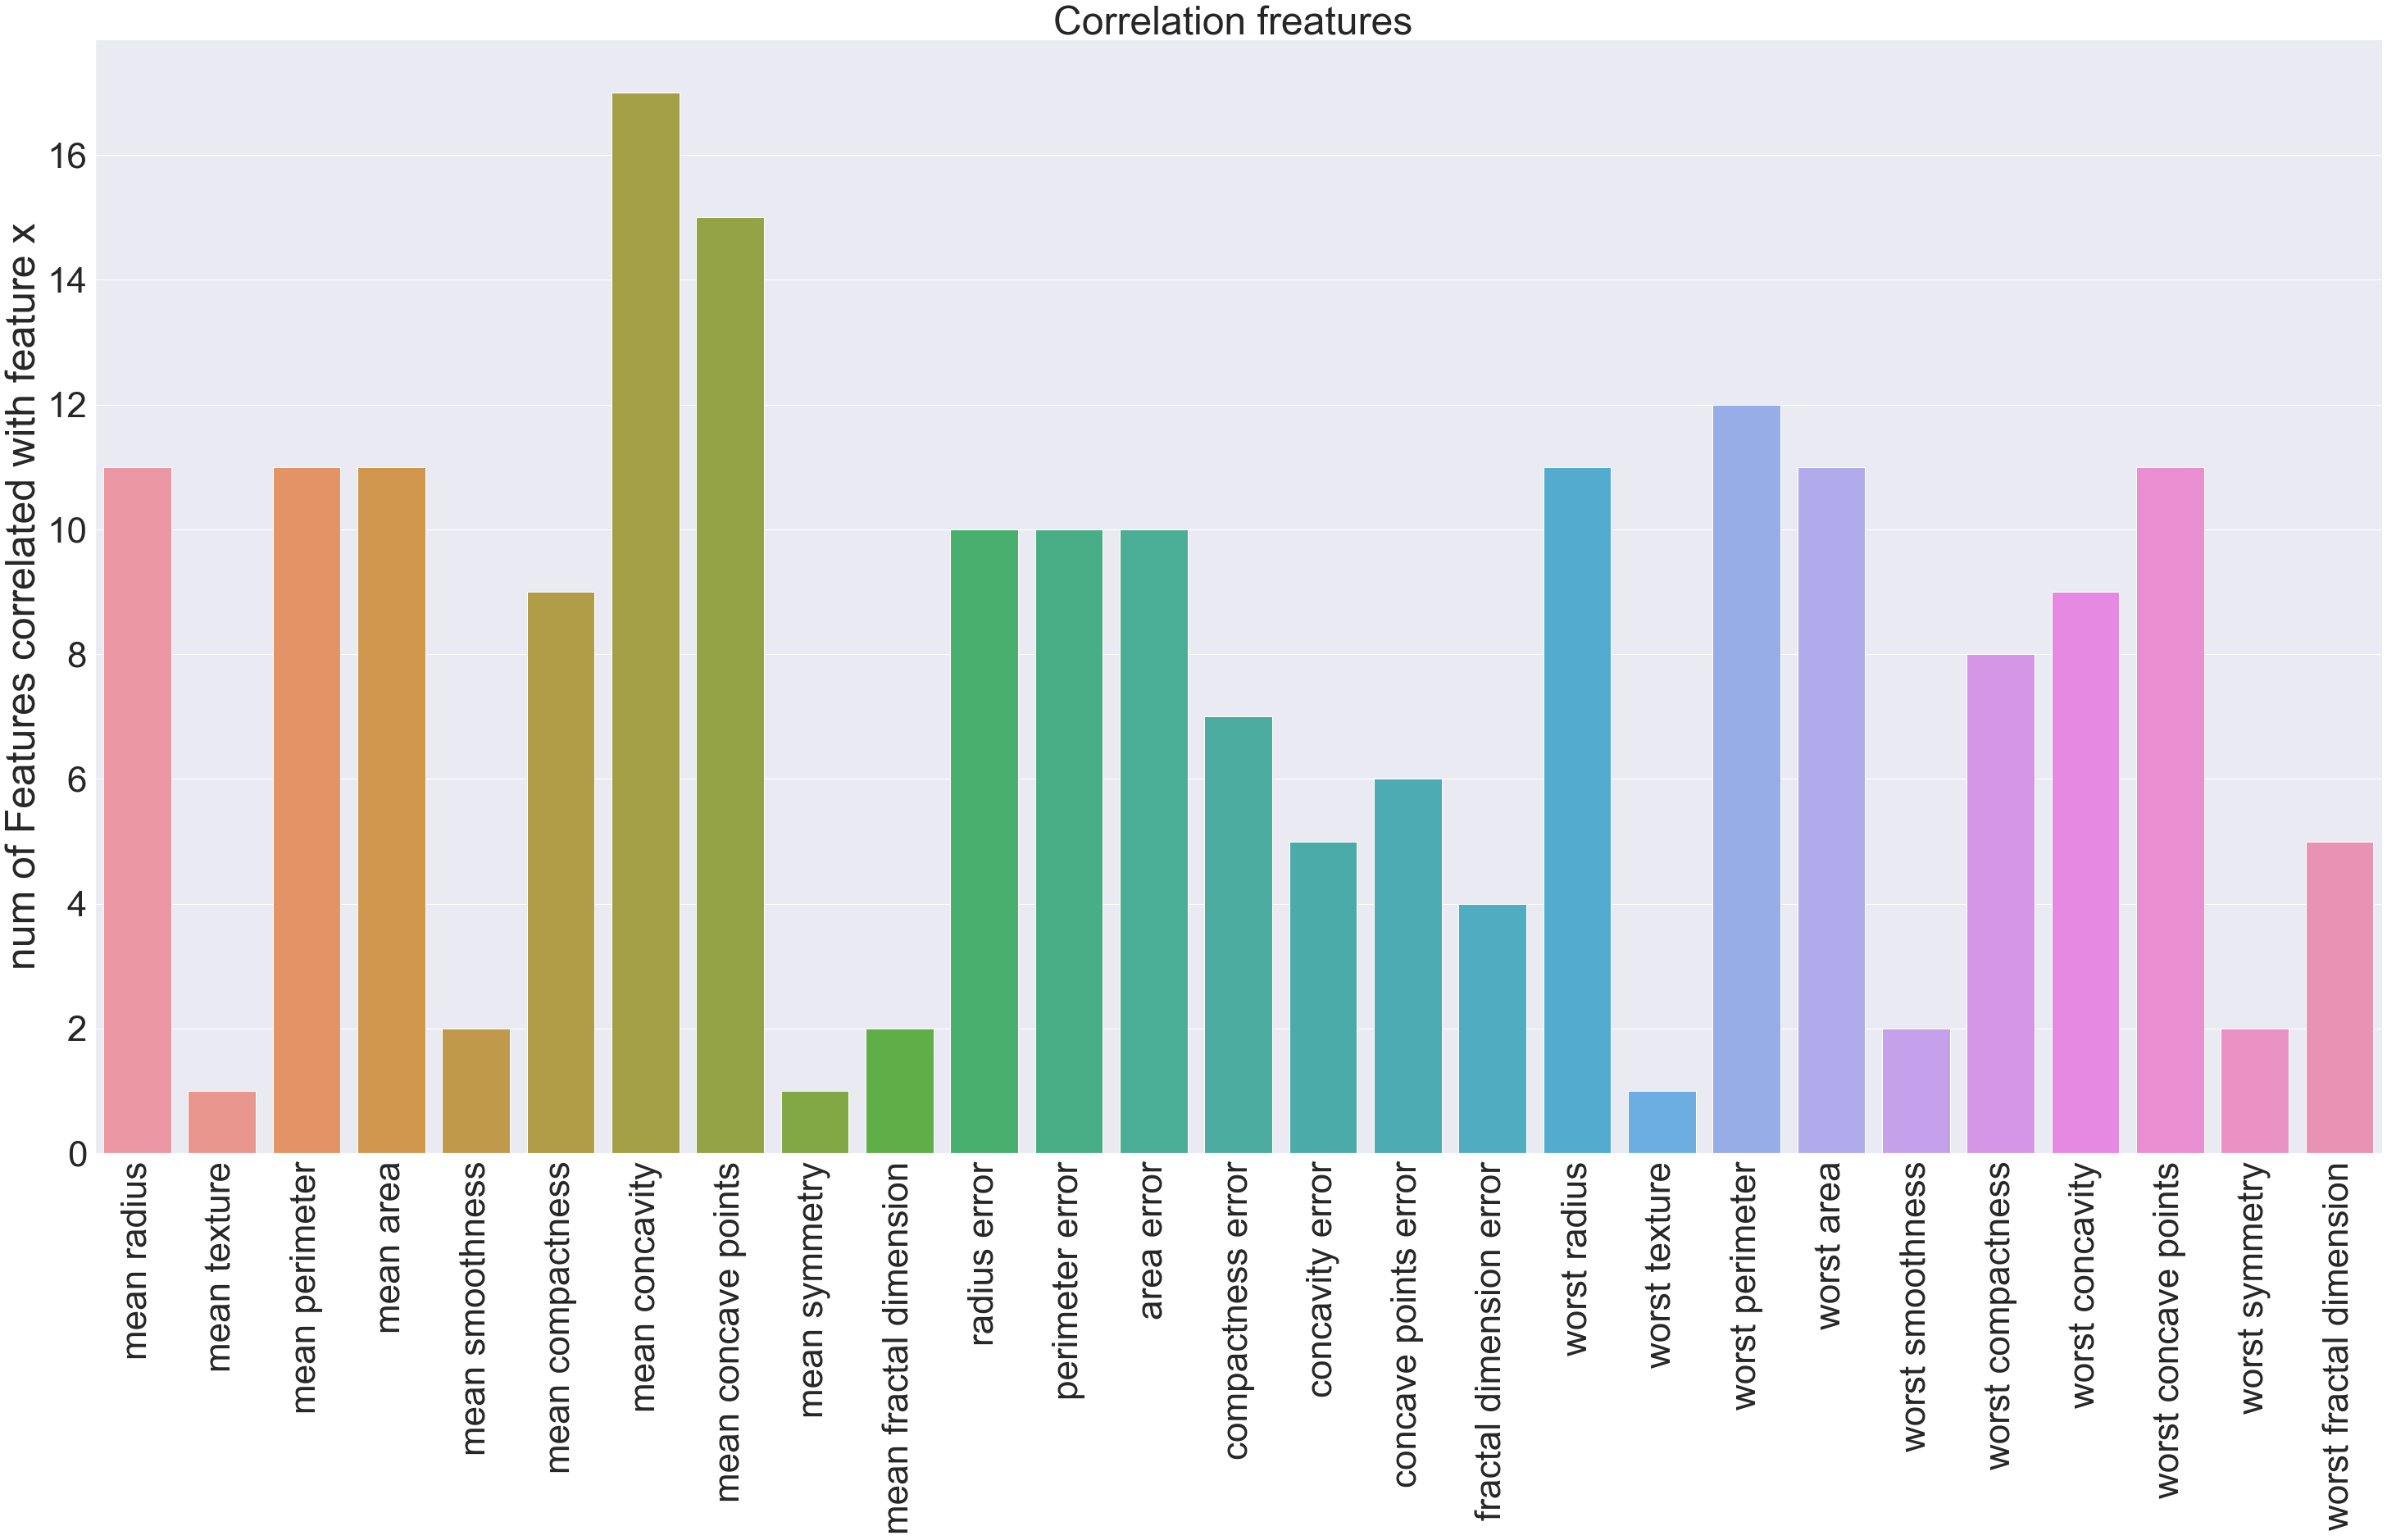

In [65]:
plt.figure(figsize=(50,25))

sns.barplot( x=name_list, y= strong_corr )
sns.set(font_scale=4)
plt.title("Correlation freatures ")
plt.xticks(rotation=90)
plt.ylabel("num of Features correlated with feature x",fontsize=50)

# PCA object

In [26]:
scaler_bc.fit(df_features)
data_scaled = scaler_bc.transform(df_features)

In [27]:
pca = PCA()

In [28]:
pca.fit(data_scaled)

PCA()

In [29]:
pca_data = pca.transform(data_scaled)

In [30]:
pca_data.shape

(569, 30)

# Scree Plot analysis

In [31]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals = 1)
labels = ["PC" + str(x) for x in range(1,len(per_var)+1)]

#df_var = pd.DataFrame(per_var,columns=labels)

Text(0, 0.5, 'Variance %')

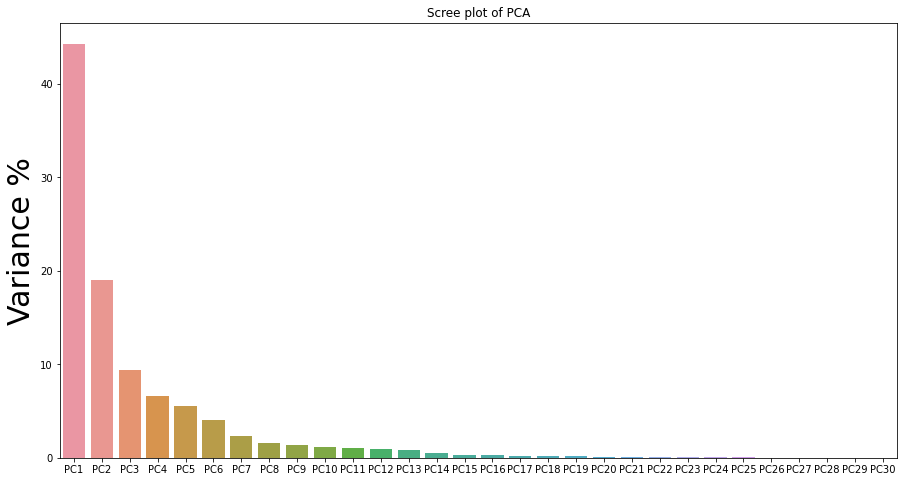

In [32]:
plt.figure(figsize=(15,8))

sns.barplot( x=labels, y= per_var )

plt.title("Scree plot of PCA")
plt.ylabel("Variance %",fontsize=30)

Seems 3 Principal components should sufice to describe the dataset.

In [33]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1
print(d)

7


But 7 is needed to explain 90\% of the variance that is still alot of reduction from 30

In [34]:
pca_df = pd.DataFrame(pca_data,index = paitent_nr,columns = labels)

In [36]:
#For running through the neural netwrok, Trying with the 90% variance coverage and 74%
#90%
pca_df_90 =pca_df[["PC1","PC2","PC3","PC4","PC5","PC6","PC7"]]

#74 % with 3 features for plotting
pca_df = pca_df[["PC1","PC2","PC3"]]



In [37]:
pca_df
#Storing the PCA to use for the Neural network.

pca_df.to_csv("Breast_cancer_PCA", encoding='utf-8', index=False)

pca_df_90.to_csv("Breast_cancer_PCA_90", encoding='utf-8', index=False)

# Plotting if the PCA is suxcesfull in splitting the malignant and benign cancers

C:\Users\Lasse\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PC1 v PC2')

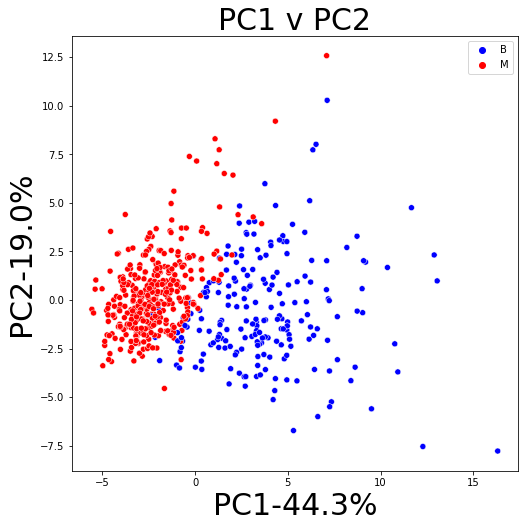

In [20]:
ax = plt.figure(figsize=(8,8))
sns.scatterplot(pca_df.PC1, pca_df.PC2,hue=diagnosis, palette =["b","r"])
plt.xlabel("PC1-{0}%".format(per_var[0]),fontsize=30)
plt.ylabel("PC2-{0}%".format(per_var[1]),fontsize=30)
plt.title("PC1 v PC2",fontsize=30)

C:\Users\Lasse\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PC1 v PC3')

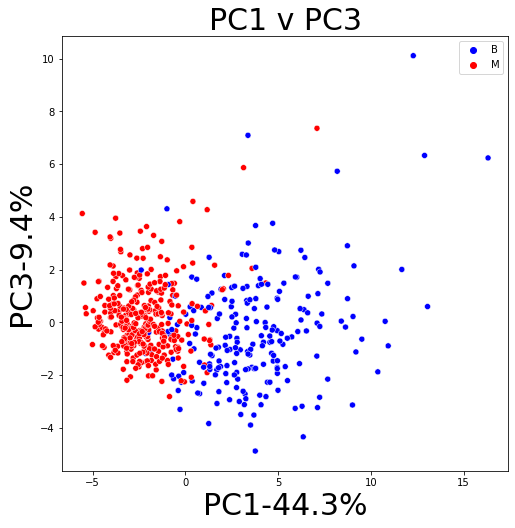

In [21]:
ax = plt.figure(figsize=(8,8))
sns.scatterplot(pca_df.PC1, pca_df.PC3,hue=diagnosis, palette =["b","r"] )
plt.xlabel("PC1-{0}%".format(per_var[0]),fontsize=30)
plt.ylabel("PC3-{0}%".format(per_var[2]),fontsize=30)
plt.title("PC1 v PC3",fontsize=30)

C:\Users\Lasse\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PC2 v PC3')

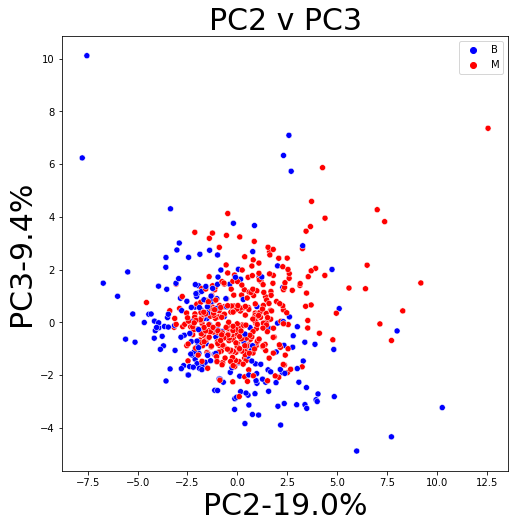

In [22]:
ax = plt.figure(figsize=(8,8))
sns.scatterplot(pca_df.PC2, pca_df.PC3,hue=diagnosis, palette =["b","r"])
plt.xlabel("PC2-{0}%".format(per_var[1]),fontsize=30)
plt.ylabel("PC3-{0}%".format(per_var[2]),fontsize=30)
plt.title("PC2 v PC3",fontsize=30)

In [23]:
import plotly.express as px
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
              color= diagnosis)
fig.show()

# Load score analysis of PC 1 and 2

In [24]:
loading_scores_1  = pd.Series(pca.components_[0],index=names)
loading_scores_2  = pd.Series(pca.components_[1],index=names)

In [32]:

sort_loading_scores_1 = loading_scores_1.abs().sort_values(ascending=False)
ten_features_1 = sort_loading_scores_1[0:10].index.values


sort_loading_scores_2 = loading_scores_2.abs().sort_values(ascending=False)
ten_features_2 = sort_loading_scores_2[0:10].index.values

df_load = pd.DataFrame(loading_scores_1[ten_features_1])
df_load.to_latex()





#print(loading_scores_2[ten_features_2])

'\\begin{tabular}{lr}\n\\toprule\n{} &         0 \\\\\n\\midrule\nmean concave points  &  0.260854 \\\\\nmean concavity       &  0.258400 \\\\\nworst concave points &  0.250886 \\\\\nmean compactness     &  0.239285 \\\\\nworst perimeter      &  0.236640 \\\\\nworst concavity      &  0.228768 \\\\\nworst radius         &  0.227997 \\\\\nmean perimeter       &  0.227537 \\\\\nworst area           &  0.224871 \\\\\nmean area            &  0.220995 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [26]:
#PC 1 2 and 3 in a dataframe
df_comp = pd.DataFrame(pca.components_[0:3],columns=names,index = ["PC1","PC2","PC3"])

In [27]:
df_comp

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
PC1     0.218902      0.103725        0.227537   0.220995         0.142590   
PC2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
PC3    -0.008531      0.064550       -0.009314   0.028700        -0.104292   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
PC1          0.239285        0.258400             0.260854       0.138167   
PC2          0.151892        0.060165            -0.034768       0.190349   
PC3         -0.074092        0.002734            -0.025564      -0.040240   

     mean fractal dimension  ...  worst radius  worst texture  \
PC1                0.064363  ...      0.227997       0.104469   
PC2                0.366575  ...     -0.219866      -0.045467   
PC3               -0.022574  ...     -0.047507      -0.042298   

     worst perimeter  worst area  worst smoothness  worst compactness  \
PC1         0.236640    0.224871          0.127953           0.210096   
PC2        -0.199878   -0.219352          0.172304           0.143593   
PC3        -0.048547   -0.011902         -0.259798          -0.236076   

     worst concavity  worst concave points  worst symmetry  \
PC1         0.228768              0.250886        0.122905   
PC2         0.097964             -0.008257        0.141883   
PC3        -0.173057             -0.170344       -0.271313   

     worst fractal dimension  
PC1                 0.131784  
PC2                 0.275339  
PC3                -0.232791  

[3 rows x 30 columns]

<AxesSubplot:>

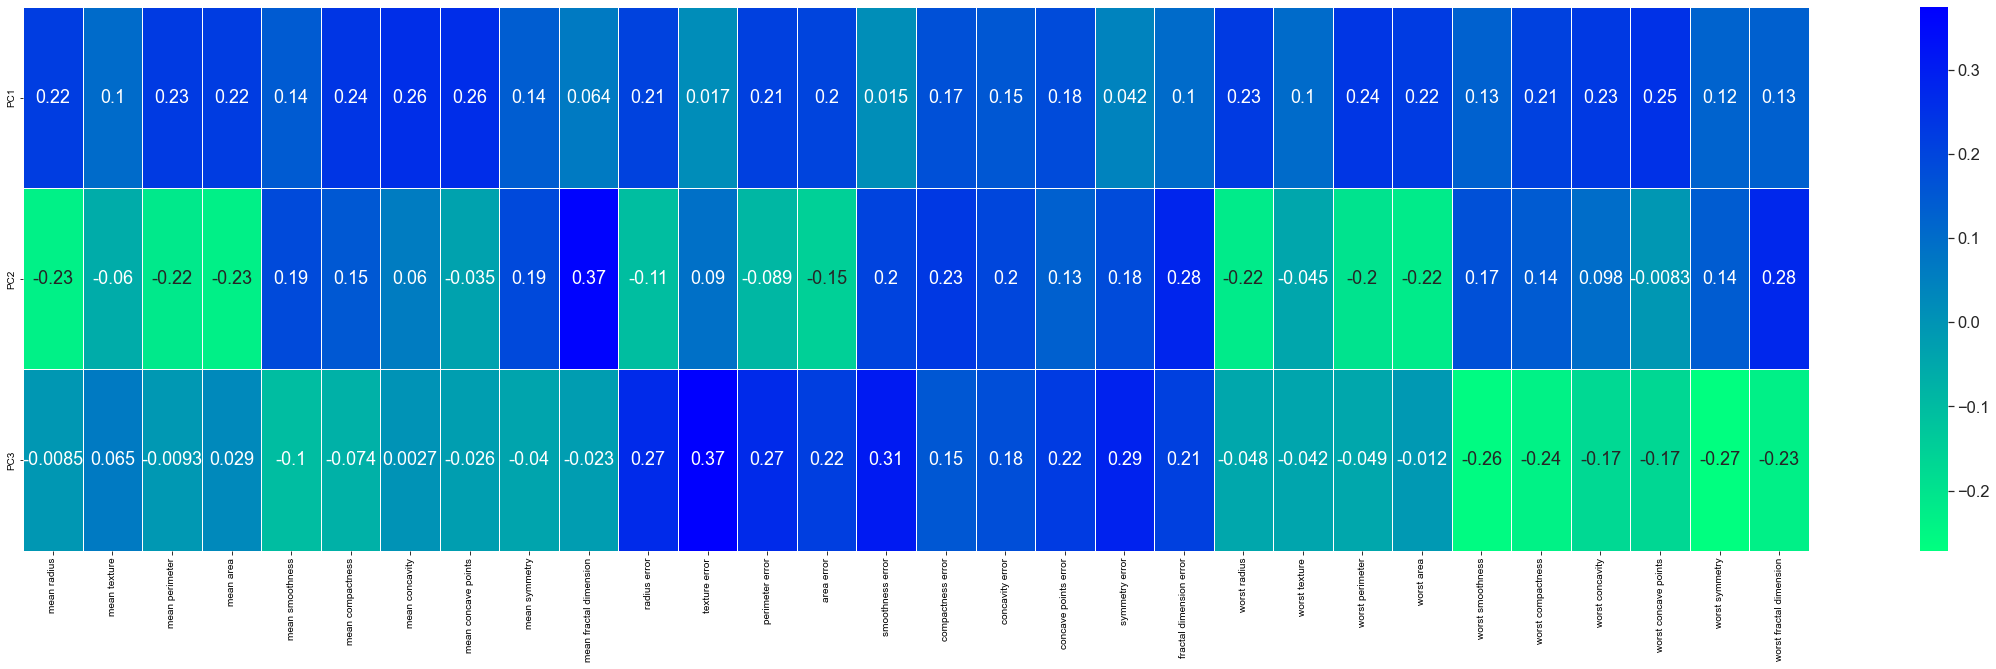

In [28]:

fig, ax = plt.subplots(figsize=(40,10)) 
sns.set(font_scale=1.5)
sns.heatmap(df_comp,cmap='winter_r', annot=True ,linewidths=.9,ax =ax ,fmt = ".2g") # _r to reverse the cmap

In [40]:
test = pd.read_csv("Breast_cancer_PCA")

In [41]:
test

PC1        PC2       PC3
0     9.192837   1.948583 -1.123166
1     2.387802  -3.768172 -0.529293
2     5.733896  -1.075174 -0.551748
3     7.122953  10.275589 -3.232790
4     3.935302  -1.948072  1.389767
..         ...        ...       ...
564   6.439315  -3.576817  2.459487
565   3.793382  -3.584048  2.088476
566   1.256179  -1.902297  0.562731
567  10.374794   1.672010 -1.877029
568  -5.475243  -0.670637  1.490443

[569 rows x 3 columns]